In [48]:
import MetaTrader5 as mt5
import pandas as pd
import pandas_ta as ta
import time
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pytz
from pylab import mpl, plt

In [49]:
if not mt5.initialize():
    print('initialize() falhou')
    mt5.shutdown()

In [50]:
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

In [51]:
ativo_analise = 'WDOH22'
df_analise = mt5.copy_ticks_from(ativo_analise, datetime(2022, 1, 2),100000000, mt5.COPY_TICKS_ALL)
df_analise = pd.DataFrame(df_analise)
df_analise['time'] = pd.to_datetime(df_analise['time'], unit='s')
df_analise.drop(['flags', 'time_msc', 'volume_real'], axis = 1, inplace=True)
df_analise.set_index('time', inplace=True)
df_analise['M1000'] = ta.sma(df_analise['last'], length=1000)
df_analise['M5000'] = ta.sma(df_analise['last'], length=5000)
df_analise['M10000'] = ta.sma(df_analise['last'], length=10000)
df_analise

bid     ask    last  volume     M1000      M5000  \
time                                                                       
2022-01-03 09:03:00     0.0  5728.0     0.0       0       NaN        NaN   
2022-01-03 09:03:59  5673.0  5728.0     0.0       0       NaN        NaN   
2022-01-03 09:04:06     0.0  5728.0     0.0       0       NaN        NaN   
2022-01-03 09:04:29     0.0  5700.0     0.0       0       NaN        NaN   
2022-01-03 09:04:56     0.0  5675.0     0.0       0       NaN        NaN   
...                     ...     ...     ...     ...       ...        ...   
2022-02-08 12:55:41  5299.5  5300.0  5299.5       1  5301.265  5301.7138   
2022-02-08 12:55:42  5299.5  5300.0  5299.5       1  5301.261  5301.7125   
2022-02-08 12:55:42  5299.5  5300.0  5299.5       1  5301.257  5301.7112   
2022-02-08 12:55:43  5299.5  5300.0  5299.5       4  5301.253  5301.7099   
2022-02-08 12:55:43  5299.5  5300.0  5299.5       5  5301.249  5301.7087   

                         M10000  
time                             
2022-01-03 09:03:00         NaN  
2022-01-03 09:03:59         NaN  
2022-01-03 09:04:06         NaN  
2022-01-03 09:04:29         NaN  
2022-01-03 09:04:56         NaN  
...                         ...  
2022-02-08 12:55:41  5304.77790  
2022-02-08 12:55:42  5304.77730  
2022-02-08 12:55:42  5304.77665  
2022-02-08 12:55:43  5304.77605  
2022-02-08 12:55:43  5304.77545  

[1742267 rows x 7 columns]

In [52]:
#inicialmente teste com 1000ticks
df_analise['Dist1k'] = df_analise['last']-df_analise['M1000'] 
df_analise['Dist5k'] = df_analise['last']-df_analise['M5000']
df_analise['Dist10k'] = df_analise['last']-df_analise['M10000']

In [53]:
df_analise['timeframe'] = df_analise.index
df_analise['timeframe'] = df_analise['timeframe'].astype(str)
df_analise.dtypes

bid          float64
ask          float64
last         float64
volume        uint64
M1000        float64
M5000        float64
M10000       float64
Dist1k       float64
Dist5k       float64
Dist10k      float64
timeframe     object
dtype: object

In [54]:
df_analise['Ano'] = df_analise['timeframe'].apply(lambda x: int(x.split(' ')[0].split('-')[0]))
df_analise['Mes'] = df_analise['timeframe'].apply(lambda x: int(x.split(' ')[0].split('-')[1]))
df_analise['Dia'] = df_analise['timeframe'].apply(lambda x: int(x.split(' ')[0].split('-')[2]))
df_analise['Hora'] = df_analise['timeframe'].apply(lambda x: int(x.split(' ')[1].split(':')[0]))
df_analise['Min'] = df_analise['timeframe'].apply(lambda x: int(x.split(' ')[1].split(':')[1]))
df_analise['Seg'] = df_analise['timeframe'].apply(lambda x: int(x.split(' ')[1].split(':')[2]))

In [55]:
df_analise.tail()

bid     ask    last  volume     M1000      M5000  \
time                                                                       
2022-02-08 12:55:41  5299.5  5300.0  5299.5       1  5301.265  5301.7138   
2022-02-08 12:55:42  5299.5  5300.0  5299.5       1  5301.261  5301.7125   
2022-02-08 12:55:42  5299.5  5300.0  5299.5       1  5301.257  5301.7112   
2022-02-08 12:55:43  5299.5  5300.0  5299.5       4  5301.253  5301.7099   
2022-02-08 12:55:43  5299.5  5300.0  5299.5       5  5301.249  5301.7087   

                         M10000  Dist1k  Dist5k  Dist10k            timeframe  \
time                                                                            
2022-02-08 12:55:41  5304.77790  -1.765 -2.2138 -5.27790  2022-02-08 12:55:41   
2022-02-08 12:55:42  5304.77730  -1.761 -2.2125 -5.27730  2022-02-08 12:55:42   
2022-02-08 12:55:42  5304.77665  -1.757 -2.2112 -5.27665  2022-02-08 12:55:42   
2022-02-08 12:55:43  5304.77605  -1.753 -2.2099 -5.27605  2022-02-08 12:55:43   
2022-02-08 12:55:43  5304.77545  -1.749 -2.2087 -5.27545  2022-02-08 12:55:43   

                      Ano  Mes  Dia  Hora  Min  Seg  
time                                                 
2022-02-08 12:55:41  2022    2    8    12   55   41  
2022-02-08 12:55:42  2022    2    8    12   55   42  
2022-02-08 12:55:42  2022    2    8    12   55   42  
2022-02-08 12:55:43  2022    2    8    12   55   43  
2022-02-08 12:55:43  2022    2    8    12   55   43

In [56]:
df_analise.Dia.value_counts()

3     255863
1     249430
7     246687
4     236511
31    231550
2     231135
8     155950
28     29378
27     18329
21     10131
26      9435
19      8821
20      8418
24      8132
18      8100
25      6023
5       4578
13      4065
6       4064
14      3760
12      3648
10      3119
11      2750
17      2390
Name: Dia, dtype: int64

In [117]:
df = df_analise[df_analise['volume'] > 0]

In [118]:
# filtro do das 9 horas
df = df[df['Hora'] == 10]
df = df[df['Min'] > 0]
df.dropna(inplace=True)
df = df[df['Dist1k'] < 5]
df = df[df['Dist1k'] > -5]
df = df[df['Mes'] == 1]
#df = df[df['Dia'] == 7]

In [119]:
percentil(df['Dist1k'], up = 80, down = 20)

(1.6450000000004366, -2.237500000000182)

In [120]:
"""df = df_analise.loc['2022-02-05':]
df"""

"df = df_analise.loc['2022-02-05':]\ndf"

In [121]:
df.Hora.value_counts()

10    36296
Name: Hora, dtype: int64

In [122]:
def percentil(data, up=90, down=10):
    x = data
    array_x = np.array(x)
    percentil_up = np.percentile(array_x, up)
    percentil_down = np.percentile(array_x, down)
    
    return percentil_up, percentil_down

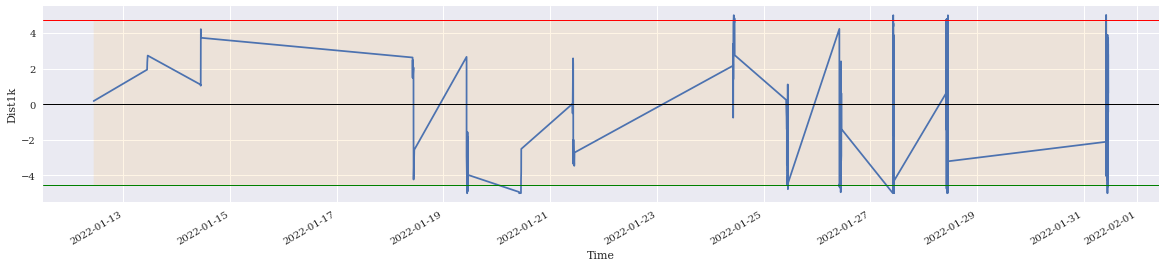

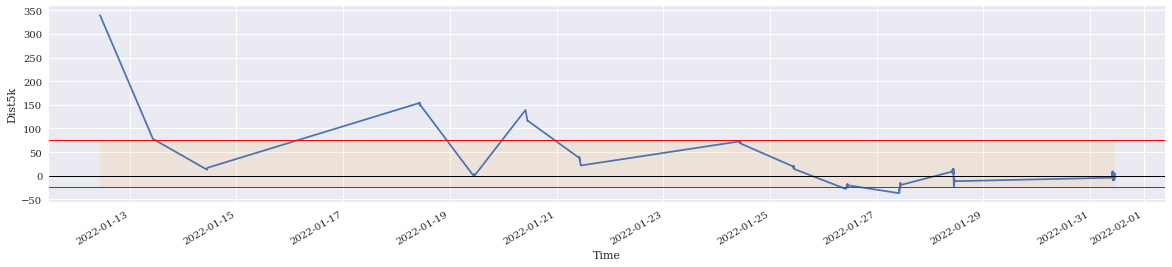

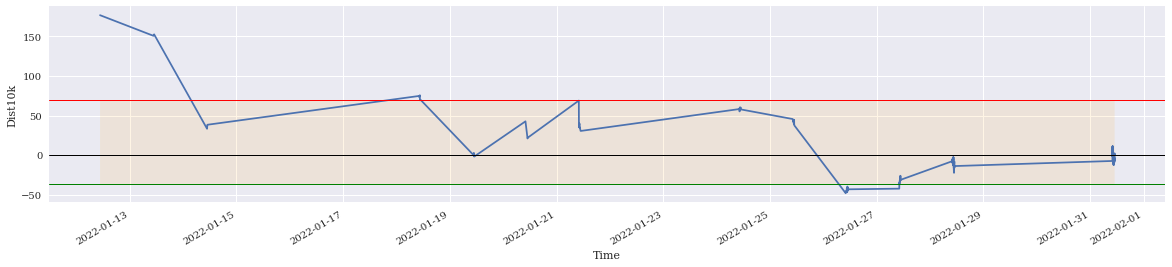

In [123]:
plt.rcParams['figure.figsize'] = (20,4)

per_dist1k = percentil(df['Dist1k'], up=99, down=1)
ax = df['Dist1k'].plot()
ax.fill_between(df.index, per_dist1k[0], per_dist1k[1],facecolor= 'orange', alpha= 0.1)
plt.axhline(per_dist1k[0], color="red", lw=1.0)
plt.axhline(0, color="black", lw=1.0)
plt.axhline(per_dist1k[1], color="green", lw=1.0)
plt.xlabel('Time')
plt.ylabel('Dist1k')
plt.show()

per_dist5k = percentil(df['Dist5k'], up=99, down=1)
ax = df['Dist5k'].plot()
ax.fill_between(df.index, per_dist5k[0], per_dist5k[1],facecolor= 'orange', alpha= 0.1)
plt.axhline(per_dist5k[0], color="red", lw=1.0)
plt.axhline(0, color="black", lw=1.0)
plt.axhline(per_dist5k[1], color="green", lw=1.0)
plt.xlabel('Time')
plt.ylabel('Dist5k')
plt.show()

per_dist10k = percentil(df['Dist10k'], up=99, down=1)
ax = df['Dist10k'].plot()
ax.fill_between(df.index, per_dist10k[0], per_dist10k[1],facecolor= 'orange', alpha= 0.1)
plt.axhline(per_dist10k[0], color="red", lw=1.0)
plt.axhline(0, color="black", lw=1.0)
plt.axhline(per_dist10k[1], color="green", lw=1.0)
plt.xlabel('Time')
plt.ylabel('Dist10k')
plt.show()

In [124]:
df_plot = df[['Dia', 'Dist1k']]

In [125]:
import plotly.express as px

fig = px.scatter_matrix(df_plot)
fig.show()

fig2 = px.scatter(df_plot, x='Dia', y='Dist1k',marginal_x='box', marginal_y='violin',  hover_name='Dia')
fig2.show()

In [78]:
df['Dist1k'].describe()

count    31598.000000
mean        -0.263172
std          1.612811
min         -4.984000
25%         -1.452375
50%         -0.390500
75%          0.985000
max          4.255000
Name: Dist1k, dtype: float64

In [79]:
df['Dist5k'].describe()

count    31598.000000
mean        -1.366204
std          3.725761
min         -8.785100
25%         -4.090200
50%         -1.531500
75%          1.246900
max          8.887600
Name: Dist5k, dtype: float64

In [80]:
df['Dist10k'].describe()

count    31598.000000
mean        -2.668855
std          5.369101
min        -14.386250
25%         -7.096063
50%         -1.535750
75%          1.172075
max          8.575150
Name: Dist10k, dtype: float64